<a href="https://colab.research.google.com/github/hrushikute/DataAnalytics/blob/master/Detect_sarcasm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Binary classifier on sarcasm Dataset


## Download the data 

In [1]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-06-27 14:50:47--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 108.177.119.128, 142.251.18.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2022-06-27 14:50:47 (137 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [2]:
import json
with open('./sarcasm.json','r') as file:
  df = json.load(file)

# Initalize the sentences and labels
sentences =[]
labels=[]

# Ge the data from data dataframe in to lists
for items in df:
  sentences.append(items['headline'])
  labels.append(items['is_sarcastic'])

print(len(sentences))

26709


## Hyper-parmeters

In [3]:
# Number of examples in training 
training_data_size = 20000

# Vocabulary size of the tokenizer
vocab_size =10000

# Maximum  length of padded sequence
max_length = 32 

#output dimensions of embeding layer
embedding_dim = 16

### Split the dataset

In [4]:
training_sentences = sentences[0:training_data_size]
training_labels = labels[0:training_data_size]

testing_sentences = sentences[training_data_size:]
testing_labels = labels[training_data_size:]

## Preprocessing the train and test sets

In [5]:
import numpy as np
from tensorflow.keras.preprocessing.text  import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Parmeters for padding OOV tokens

trunc_type='post'
padding_type='post'
oov_tok ="<OOV>"

# Initalize tokenizer

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Genereate word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Genrate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, truncating=trunc_type, padding=padding_type,maxlen=max_length)

# Genrate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, truncating=trunc_type, padding=padding_type,maxlen=max_length)

# Convert labels in numpy array

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)



## Build and compile the  model 

In [6]:
import tensorflow as tf

# Initalize a GlobalAveragePooling1D GAP1D layer

gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# Want to check how Global average pooliing layer works
# Define sample array

sample_array = np.array([[[10,2],[1,3],[1,1]]])
sample_array = np.array([[[10,2],[1,3],[1,1]]])
print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array: {sample_array}')

# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}')

shape of sample_array = (1, 3, 2)
sample array: [[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of gap1d_layer: (1, 2)
output array of gap1d_layer: [[4 2]]


In [7]:
# Build model

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
        
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 16)            160000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
)


### Train the model 

In [10]:
num_epochs=20
history=model.fit(
  training_padded,
  training_labels,
  epochs=num_epochs,
  validation_data=(testing_padded, testing_labels),
  verbose=2
)

Epoch 1/20
625/625 - 3s - loss: 0.5546 - accuracy: 0.7035 - val_loss: 0.3900 - val_accuracy: 0.8389 - 3s/epoch - 5ms/step
Epoch 2/20
625/625 - 2s - loss: 0.3063 - accuracy: 0.8774 - val_loss: 0.3408 - val_accuracy: 0.8569 - 2s/epoch - 3ms/step
Epoch 3/20
625/625 - 2s - loss: 0.2295 - accuracy: 0.9093 - val_loss: 0.3453 - val_accuracy: 0.8550 - 2s/epoch - 4ms/step
Epoch 4/20
625/625 - 2s - loss: 0.1850 - accuracy: 0.9289 - val_loss: 0.3669 - val_accuracy: 0.8493 - 2s/epoch - 3ms/step
Epoch 5/20
625/625 - 2s - loss: 0.1530 - accuracy: 0.9433 - val_loss: 0.3926 - val_accuracy: 0.8472 - 2s/epoch - 4ms/step
Epoch 6/20
625/625 - 2s - loss: 0.1294 - accuracy: 0.9548 - val_loss: 0.4408 - val_accuracy: 0.8371 - 2s/epoch - 3ms/step
Epoch 7/20
625/625 - 2s - loss: 0.1103 - accuracy: 0.9628 - val_loss: 0.4669 - val_accuracy: 0.8413 - 2s/epoch - 3ms/step
Epoch 8/20
625/625 - 2s - loss: 0.0950 - accuracy: 0.9672 - val_loss: 0.5097 - val_accuracy: 0.8375 - 2s/epoch - 3ms/step
Epoch 9/20
625/625 - 2s 

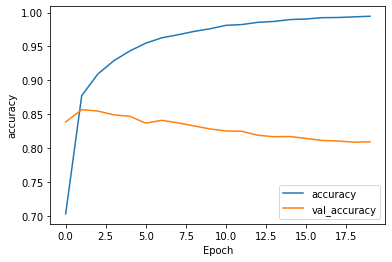

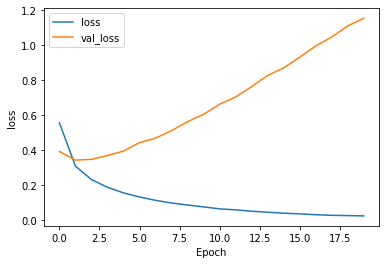

In [12]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epoch")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

#Plot the accuracy and loss
plot_graphs(history,"accuracy")
plot_graphs(history,"loss")

Visualize word Embeddings
[Tesnsor flow enbeddings](https://projector.tensorflow.org/)

In [13]:
# Get index word dictionary
reverse_word_index = tokenizer.index_word

# Get the embedding layer from the model
embedding_layer = model.layers[0]

# Get embedding weights
embedding_weights = embedding_layer.get_weights()[0]
print (embedding_weights.shape)

(10000, 16)


In [15]:
import io

out_v = io.open('vecs.tsv','w',encoding='utf-8')
out_m = io.open('meta.tsv','w',encoding='utf-8')

for word_num in range(1,vocab_size):
  word_name = reverse_word_index[word_num]
  word_embedding = embedding_weights[word_num]
  out_m.write(word_name+"\n")
  out_v.write('\t'.join([str(x) for x in word_embedding])+"\n")

out_v.close()
out_m.close()



In [16]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>